In [38]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

SyntaxError: invalid syntax (463756409.py, line 1)

SyntaxError: invalid syntax (463756409.py, line 1)

### <span style='color:green'> **[done]** </span>Loading Features data

In [ ]:
loc = '../data/'
file = 'fight_stat_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

In [ ]:
req_data = ['fighter','opponent']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    #'td avg._dif','td acc._dif','td def._dif','sub. avg._dif',
    #'slpm_dif','str. acc._dif','sapm_dif','str. def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

df = df[req_data + X + y]
df.tail(3)

### <span style='color:green'> **[done]** </span> SVM model training:

In [39]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 13), train_set=(3279, 8), validation_set=(1437, 8), test_set=(2015, 8)


,set,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,validation,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,1.572182,0.000126,-0.017271,2.039564,0.562079,-2.148820,win,win
6729,validation,Eric Shelton,Jarred Brooks,0.007043,0.16454,-1.585788,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose,lose
6730,train,Drew Dober,Joshua Burkman,1.361536,0.16454,-0.006803,0.000126,1.488122,0.123202,-0.009943,-2.148820,win,win


In [40]:
svm_clf = set_svm_clf(X_columns=X, y_columns=y, data=df, C=1, gamma='scale', kernel='poly', degree=7)
df = set_predictions(model=svm_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,validation,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,1.572182,0.000126,-0.017271,2.039564,0.562079,-2.148820,win,win
6729,validation,Eric Shelton,Jarred Brooks,0.007043,0.16454,-1.585788,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose,lose
6730,train,Drew Dober,Joshua Burkman,1.361536,0.16454,-0.006803,0.000126,1.488122,0.123202,-0.009943,-2.148820,win,win


Accuracy = 0.791067


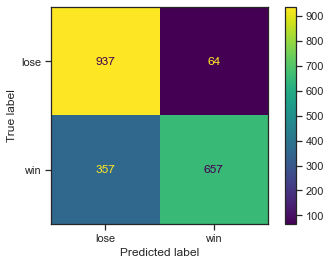

In [41]:
get_model_evaluation(data=df)

### <span style='color:green'> **[done]** </span> Tune model parameters:

#### tune linear kernel model

In [42]:
svm_linear = pd.DataFrame(columns=['kernel','C','accuracy'])

for C in tqdm([0.01, 0.1, 1, 3, 5, 10, 20, 50]):
    svm_linear = pd.concat([svm_linear, get_svm_grad_step(kernel='linear', C=C, gamma='scale', degree=1, X_columns=X, y_columns=y, data=df)], ignore_index=True)
        
max_stat_linear = svm_linear[svm_linear.accuracy==np.max(svm_linear.accuracy)].reset_index(drop=True)
print('Best Model:')
max_stat_linear

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.60it/s]

Best Model:


,kernel,C,accuracy
0,linear,50.0,0.864997


#### tune poly kernel model

In [43]:
svm_poly = pd.DataFrame(columns=['kernel','degree','accuracy'])

for degree in tqdm([2,3,4,5,6,7]):
    svm_poly = pd.concat([svm_poly, get_svm_grad_step(kernel='poly', degree=degree, X_columns=X, y_columns=y, data=df)], ignore_index=True)
        
max_stat_poly = svm_poly[svm_poly.accuracy==np.max(svm_poly.accuracy)].reset_index(drop=True) 
print('Best Model:')
max_stat_poly

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.29it/s]

Best Model:


,kernel,degree,accuracy
0,poly,3,0.843424


#### tune RBF kernel model

In [44]:
svm_rbf = pd.DataFrame(columns=['kernel','gamma','accuracy'])

for gamma in tqdm([2,3,4,5]):
    svm_rbf = pd.concat([svm_rbf, get_svm_grad_step(kernel='rbf', gamma=gamma, X_columns=X, y_columns=y, data=df)], ignore_index=True)

max_stat_rbf = svm_rbf[svm_rbf.accuracy==np.max(svm_rbf.accuracy)].reset_index(drop=True) 
print('Best Model:')
max_stat_rbf

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.22s/it]

Best Model:


,kernel,gamma,accuracy
0,rbf,2,0.792624


In [45]:
parm_tune = pd.DataFrame(columns=['kernel','C','gamma','degree','accuracy'])
parm_tune = pd.concat([parm_tune,max_stat_rbf,max_stat_poly,max_stat_linear]).reset_index(drop=True)
parm_tune

,kernel,C,gamma,degree,accuracy
0,rbf,NaN,2,NaN,0.792624
1,poly,NaN,NaN,3,0.843424
2,linear,50.0,NaN,NaN,0.864997


#### save best SVM parameters to file 

In [46]:
# get best SVM parameters to save:
row = parm_tune[parm_tune.accuracy == np.max(parm_tune.accuracy)].reset_index(drop=True)
row = row.dropna(axis=1,how='all')

param = pd.read_csv('../global_variables/ml_models_parameters.csv').drop(columns='Unnamed: 0')
param = param[param.ml_model=='knn_reg']

svm_param = pd.DataFrame(data={'ml_model':['SVM','SVM'],
                          'parameter_name':['kernel',row.columns[1]],
                          'value':[row.loc[0,'kernel'],row.loc[0,row.columns[1]]],
                          'accuracy':[row.loc[0,'accuracy'],row.loc[0,'accuracy']]}
                    )
param = pd.concat([param,svm_param]).reset_index(drop=True)
param

,ml_model,parameter_name,value,accuracy
0,knn_reg,neighbors,29,0.599900
1,SVM,kernel,linear,0.864997
2,SVM,C,50.0,0.864997


In [47]:
param.to_csv('../global_variables/ml_models_parameters.csv')
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


### <span style='color:green'> **[done]** </span> Train chosen model:

In [48]:
kernel, C, gamma, degree = get_svm_param(filename='../global_variables/ml_models_parameters.csv')

svm_clf = set_svm_clf(X_columns=X, y_columns=y, data=df, C=C, gamma=gamma, kernel=kernel, degree=degree)
df = set_predictions(model=svm_clf, data=df, X_columns=X, y_columns=y)
df.tail(3)

,set,fighter,opponent,kd_dif,str_dif,td_dif,sub_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
6728,validation,Aleksandra Albu,Kailin Curran,0.007043,-0.13660,1.572182,0.000126,-0.017271,2.039564,0.562079,-2.148820,win,win
6729,validation,Eric Shelton,Jarred Brooks,0.007043,0.16454,-1.585788,0.000126,0.076432,-0.004555,-0.009943,1.083053,lose,lose
6730,train,Drew Dober,Joshua Burkman,1.361536,0.16454,-0.006803,0.000126,1.488122,0.123202,-0.009943,-2.148820,win,win


Accuracy = 0.867494


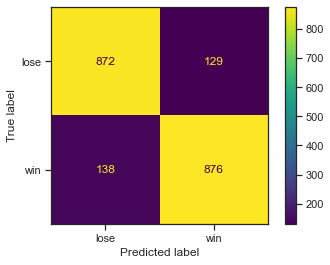

In [49]:
get_model_evaluation(data=df)

In [50]:
df.to_csv('../data/fight_results_data_trained.csv')
print('../data/fight_results_data_trained.csv saved.')

../data/fight_results_data_trained.csv saved.
